In [ ]:
student_number = "400104801"
Name = "Mehran"
Last_Name = "Bakhtiari"

#import libraries

In [ ]:
!pip install -q transformers[torch]
!pip install -q python-bidi
!pip install -q hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 70.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 19.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.24.3 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
from hazm import Normalizer, word_tokenize, stopwords_list
import os
from wordcloud import WordCloud, STOPWORDS
from bidi import algorithm as bidi
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import string
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import torch
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True


# Exploratory Data Analysis (EDA) on Movie Dataset

The Exploratory Data Analysis (EDA) process is a crucial step to understand the characteristics and patterns present in a dataset. In this notebook, we'll perform EDA on a movie dataset to gain insights into various aspects such as genre distribution, release years, runtime, and ratings for both Persian and English language movies.

During the EDA process, we'll explore the dataset by:

1. Analyzing the genre distribution for Persian and English movies to identify popular genres.
2. Examining the release year trends for Persian and English movies to understand the distribution over time.
3. Investigating the runtime statistics for Persian and English movies to study the typical movie lengths.
4. Evaluating the rating distributions for Persian and English movies to gauge audience preferences.
...

The EDA process is iterative, and additional analyses may be required based on the insights gained from the initial exploration. The goal is to develop a comprehensive understanding of the dataset for both Persian and English language movies before proceeding with further analysis or modeling.

Feel free to explore the dataset creatively and provide any additional insights or visualizations that you find interesting or valuable. We encourage you to bring your unique perspective and creativity to enhance the EDA process.

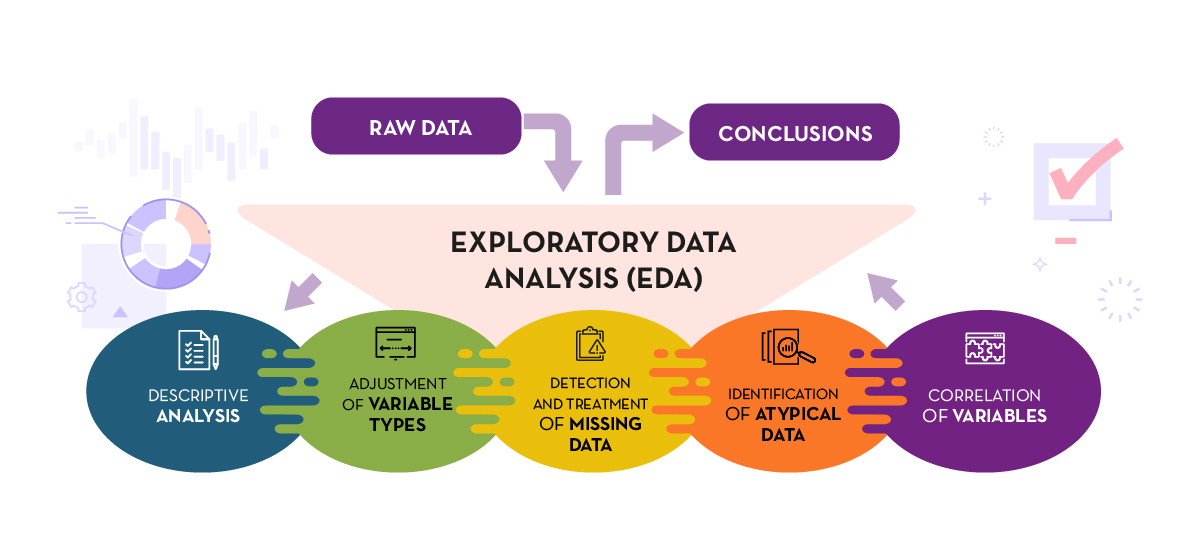

###1. **Data Preprocessing**:
   - Load the dataset
   - Check for missing values and handle them appropriately
   - Convert data types if necessary (e.g., string to datetime for release dates)
   - Create a new column called "preprocessed summary" where you perform the following steps and save the preprocessed summary in that column and later use it for the finetuning and analysis:
  *   Tokenize words
  *   Normalize text
  *   Remove punctuations
  *   Remove stopwords
  *   Removing HTML tags or markup
  *   Lemmatizing or stemming words
  *   Removing numbers or special characters
  *   Removing or replacing non-ASCII characters



In [10]:
file_path = 'persianmovies.csv'
df = pd.read_csv(file_path)

df.head()

,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85


In [13]:
class English_Preprocessor:
    def __init__(self):
        self.stopwords = set(stopwords.words('english'))
        self.nlp = spacy.load('en_core_web_sm')

    def preprocess(self, text):
        text = str(text) if text is not np.nan else ''
        text = self.normalize(text)
        text = self.remove_punctuations(text)
        words = self.word_tokenize(text)
        words = self.remove_stopwords(words)
        return ' '.join(words)

    def normalize(self, text):
        doc = self.nlp(text.lower())
        lemmatized_text = ' '.join([token.lemma_ for token in doc])
        return lemmatized_text

    def remove_punctuations(self, text):
        return re.sub(r'[^\w\s]', '', text)

    def word_tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, words):
        return [word for word in words if word not in self.stopwords]

In [14]:
english_preprocessor = English_Preprocessor()

df['Preprocessed English'] = df['Content_2'].apply(english_preprocessor.preprocess)

df.head()

,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed English
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73,jalal dropout philosophy student realize siste...
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78,murder rich twin brother barbod assume identit...
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77,man woman car accident go coma spouse know two...
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79,gilda restaurant terrible night till morning s...
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85,vahid marjan young couple get divorce month ag...


In [15]:
normalizer = Normalizer()
persian_stopwords = set(stopwords_list())

def persian_preprocess_text(text):
    text = str(text) if text is not np.nan else ''
    text = re.sub(r'[^\w\s]', '', text)
    text = normalizer.normalize(text)
    words = word_tokenize(text)
    words = [word for word in words if word not in persian_stopwords]
    return ' '.join(words)

df['Preprocessed Persian'] = df['Content_1'].apply(persian_preprocess_text)

df.head()

,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Preprocessed English,Preprocessed Persian
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73,jalal dropout philosophy student realize siste...,جلال دانشجوی سابق رشته فلسفه متوجه خواهرش اختل...
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78,murder rich twin brother barbod assume identit...,آشفتهگی رئالیستی اجتماعی فیلم عشق جنایت
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77,man woman car accident go coma spouse know two...,تصادف اتومبیل آدمهایی تقابل قرار مراقبت مصدومی...
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79,gilda restaurant terrible night till morning s...,گیلدا ماجرای زنی نام گیلدا روایت صاحب رستوانیس...
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85,vahid marjan young couple get divorce month ag...,فیلم روایت‌گر داستان زندگی زوج جوانی اسم مرجان...


### 2. **Descriptive Statistics**:
   - Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables
   - Determine the count and frequency of unique values for categorical variables

In [18]:
class DescriptiveStats:
    def __init__(self, df):
        self.df = df

    def calculate_summary_stats(self, numerical_cols):
        for col in numerical_cols:
            if col in self.df.columns:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

                print(f"Summary statistics for {col}:")
                print(f"Mean: {self.df[col].mean()}")
                print(f"Median: {self.df[col].median()}")
                print(f"Mode: {self.df[col].mode().values[0] if not self.df[col].mode().empty else 'No mode'}")
                print(f"Standard Deviation: {self.df[col].std()}")
                print(f"Range: {self.df[col].max() - self.df[col].min()}")
                print("-" * 50)
            else:
                print(f"Column {col} not found in the DataFrame.")

    def count_unique_values(self, categorical_cols):
        for col in categorical_cols:
            if col in self.df.columns:
                print(f"Unique values count and frequency for {col}:")
                unique_counts = self.df[col].value_counts()
                unique_frequencies = self.df[col].value_counts(normalize=True)
                print(unique_counts)
                print(unique_frequencies)
                print("-" * 50)
            else:
                print(f"Column {col} not found in the DataFrame.")

numerical_columns = ['Score', 'Year', 'Time']
categorical_columns = ['Genre']

stats = DescriptiveStats(df)

stats.calculate_summary_stats(numerical_columns)

stats.count_unique_values(categorical_columns)

Summary statistics for Score:
Mean: 6.532776617954071
Median: 6.8
Mode: 8.0
Standard Deviation: 1.562260838809566
Range: 10.0
--------------------------------------------------
Summary statistics for Year:
Mean: 2005.8058455114822
Median: 2010.0
Mode: 2017
Standard Deviation: 53.76508553541706
Range: 2020
--------------------------------------------------
Summary statistics for Time:
Mean: 86.166783461808
Median: 90.0
Mode: 90.0
Standard Deviation: 19.85452537320634
Range: 171.0
--------------------------------------------------
Unique values count and frequency for Genre:
Genre
Drama                       752
Comedy                      267
Action                       76
Crime                        67
Adventure                    48
Human Interest & Society     46
Arts & Literature            35
Family                       25
Culture & Traditions         24
War                          21
History                      18
Romance                      12
Architecture & Urbanism       

###3. **Data Visualization**:
   - Plot histograms or density plots for numerical variables
   - Create bar plots or pie charts for categorical variables
   - Generate scatter plots or correlation matrices to explore relationships

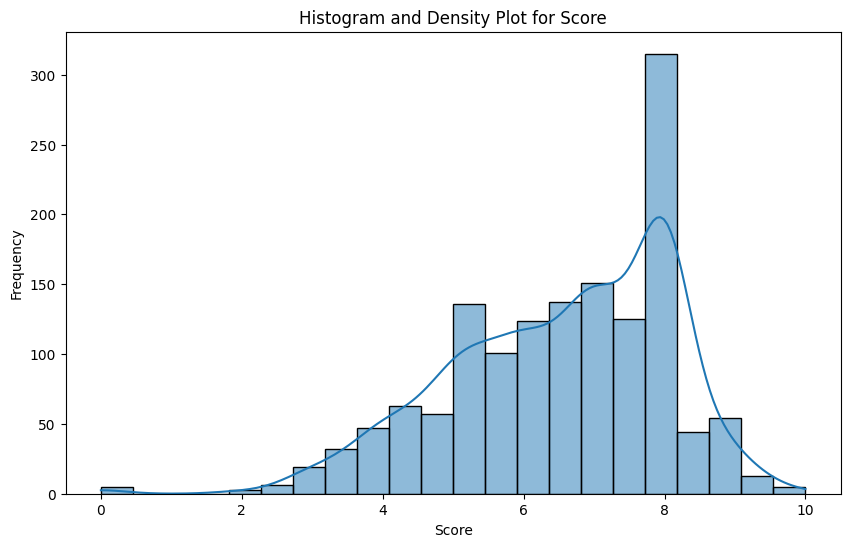

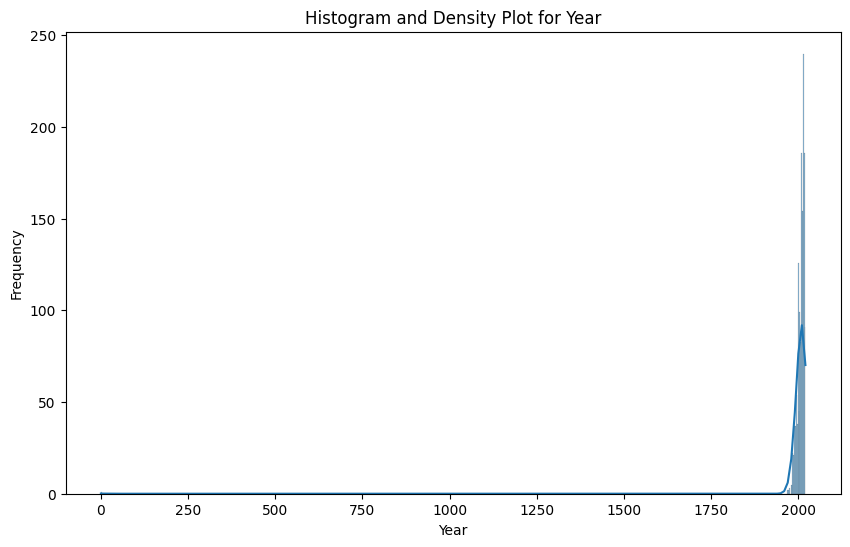

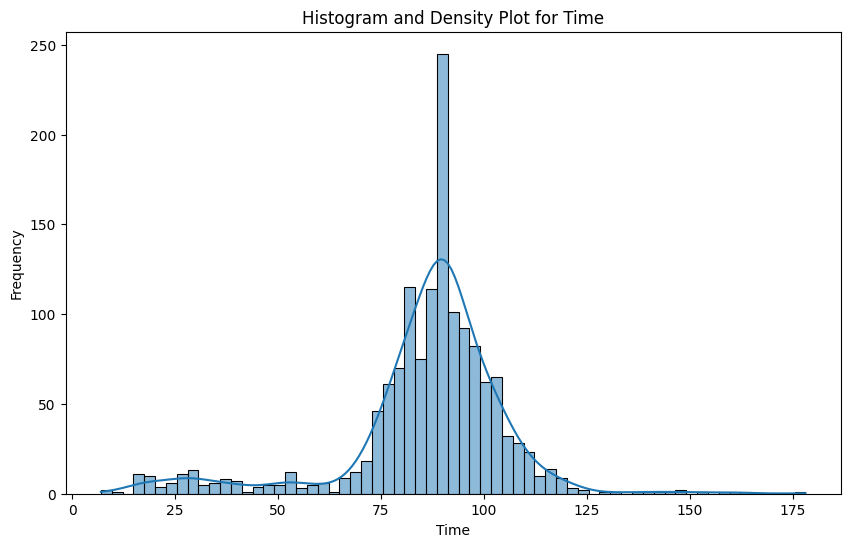

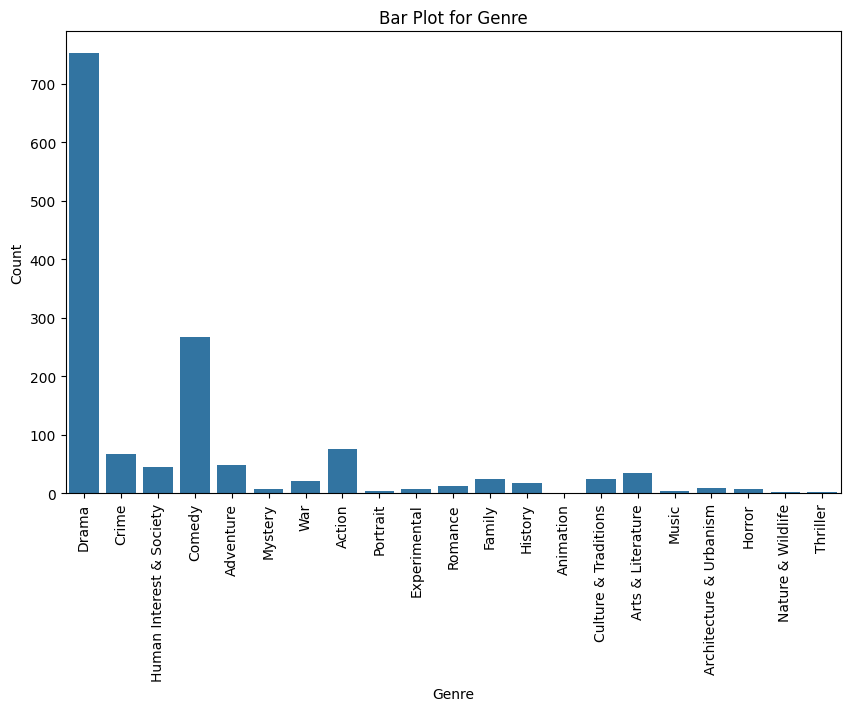

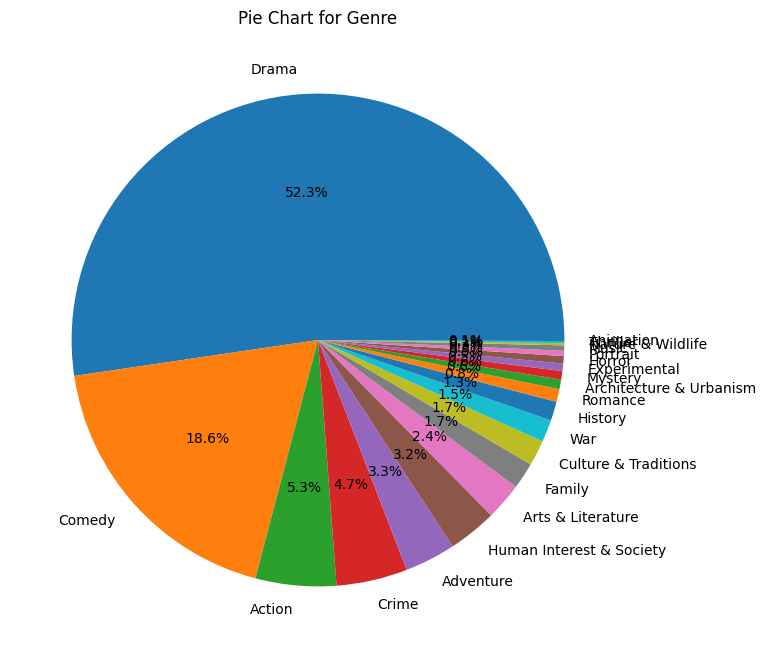

<Figure size 1200x1000 with 0 Axes>

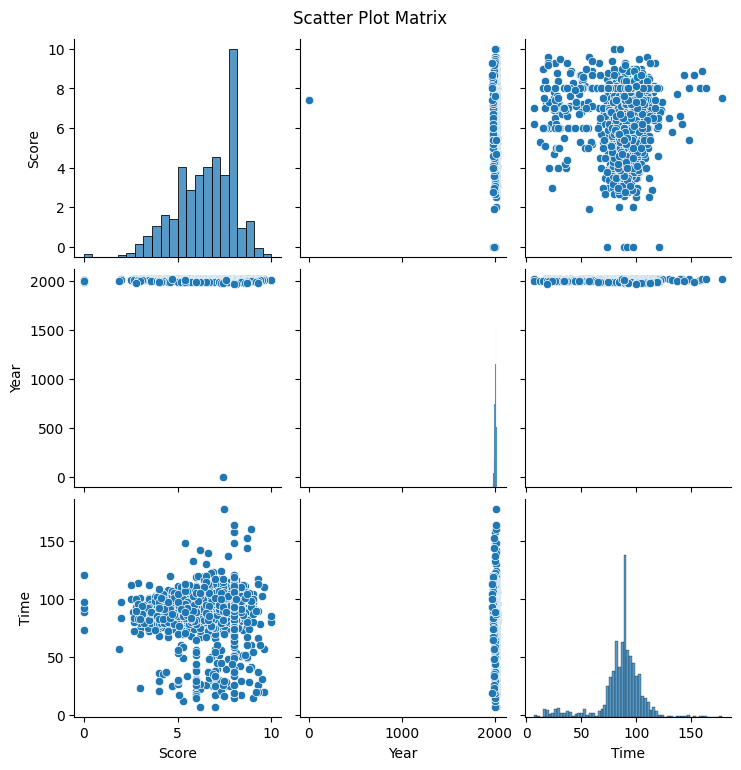

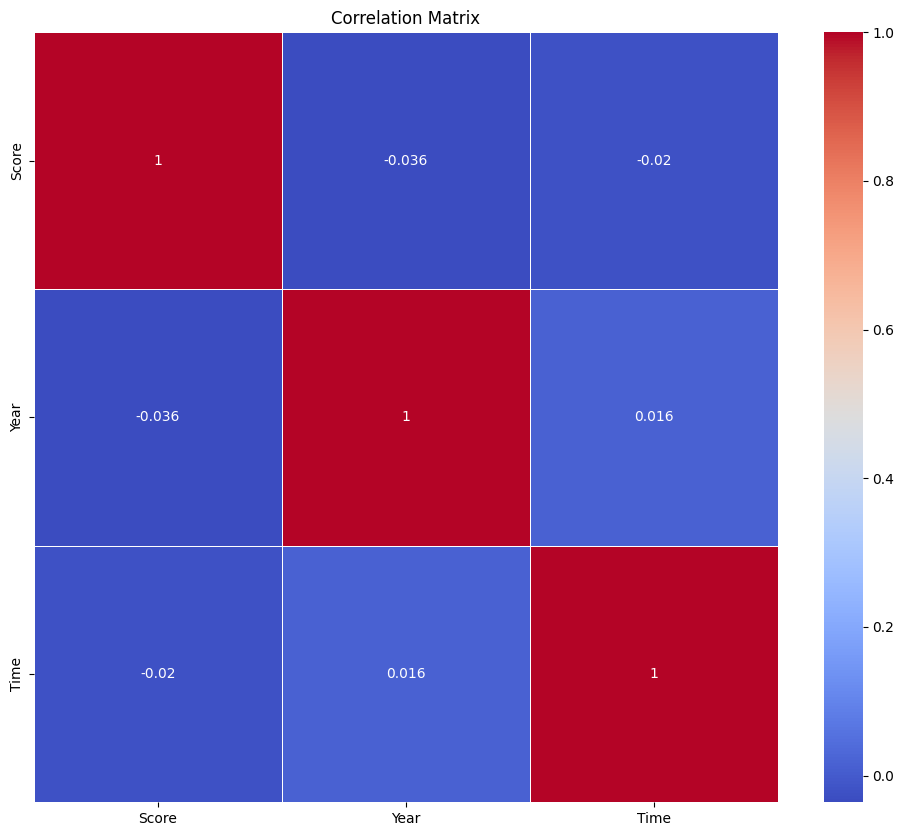

In [19]:
class DataVisualization:
    def __init__(self, df):
        self.df = df

    def plot_histograms(self, numerical_cols):
        for col in numerical_cols:
            if col in self.df.columns:
                plt.figure(figsize=(10, 6))
                sns.histplot(self.df[col], kde=True)
                plt.title(f'Histogram and Density Plot for {col}')
                plt.xlabel(col)
                plt.ylabel('Frequency')
                plt.show()
            else:
                print(f"Column {col} not found in the DataFrame.")

    def plot_categorical(self, categorical_cols):
        for col in categorical_cols:
            if col in self.df.columns:
                plt.figure(figsize=(10, 6))
                sns.countplot(x=self.df[col])
                plt.title(f'Bar Plot for {col}')
                plt.xlabel(col)
                plt.ylabel('Count')
                plt.xticks(rotation=90)
                plt.show()

                plt.figure(figsize=(8, 8))
                self.df[col].value_counts().plot.pie(autopct='%1.1f%%')
                plt.title(f'Pie Chart for {col}')
                plt.ylabel('')
                plt.show()
            else:
                print(f"Column {col} not found in the DataFrame.")

    def plot_relationships(self, numerical_cols):
        if all(col in self.df.columns for col in numerical_cols):
            plt.figure(figsize=(12, 10))
            sns.pairplot(self.df[numerical_cols])
            plt.suptitle('Scatter Plot Matrix', y=1.02)
            plt.show()

            plt.figure(figsize=(12, 10))
            corr_matrix = self.df[numerical_cols].corr()
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
            plt.title('Correlation Matrix')
            plt.show()
        else:
            print("One or more columns not found in the DataFrame.")

numerical_columns = ['Score', 'Year', 'Time']
categorical_columns = ['Genre']

viz = DataVisualization(df)

viz.plot_histograms(numerical_columns)

viz.plot_categorical(categorical_columns)

viz.plot_relationships(numerical_columns)

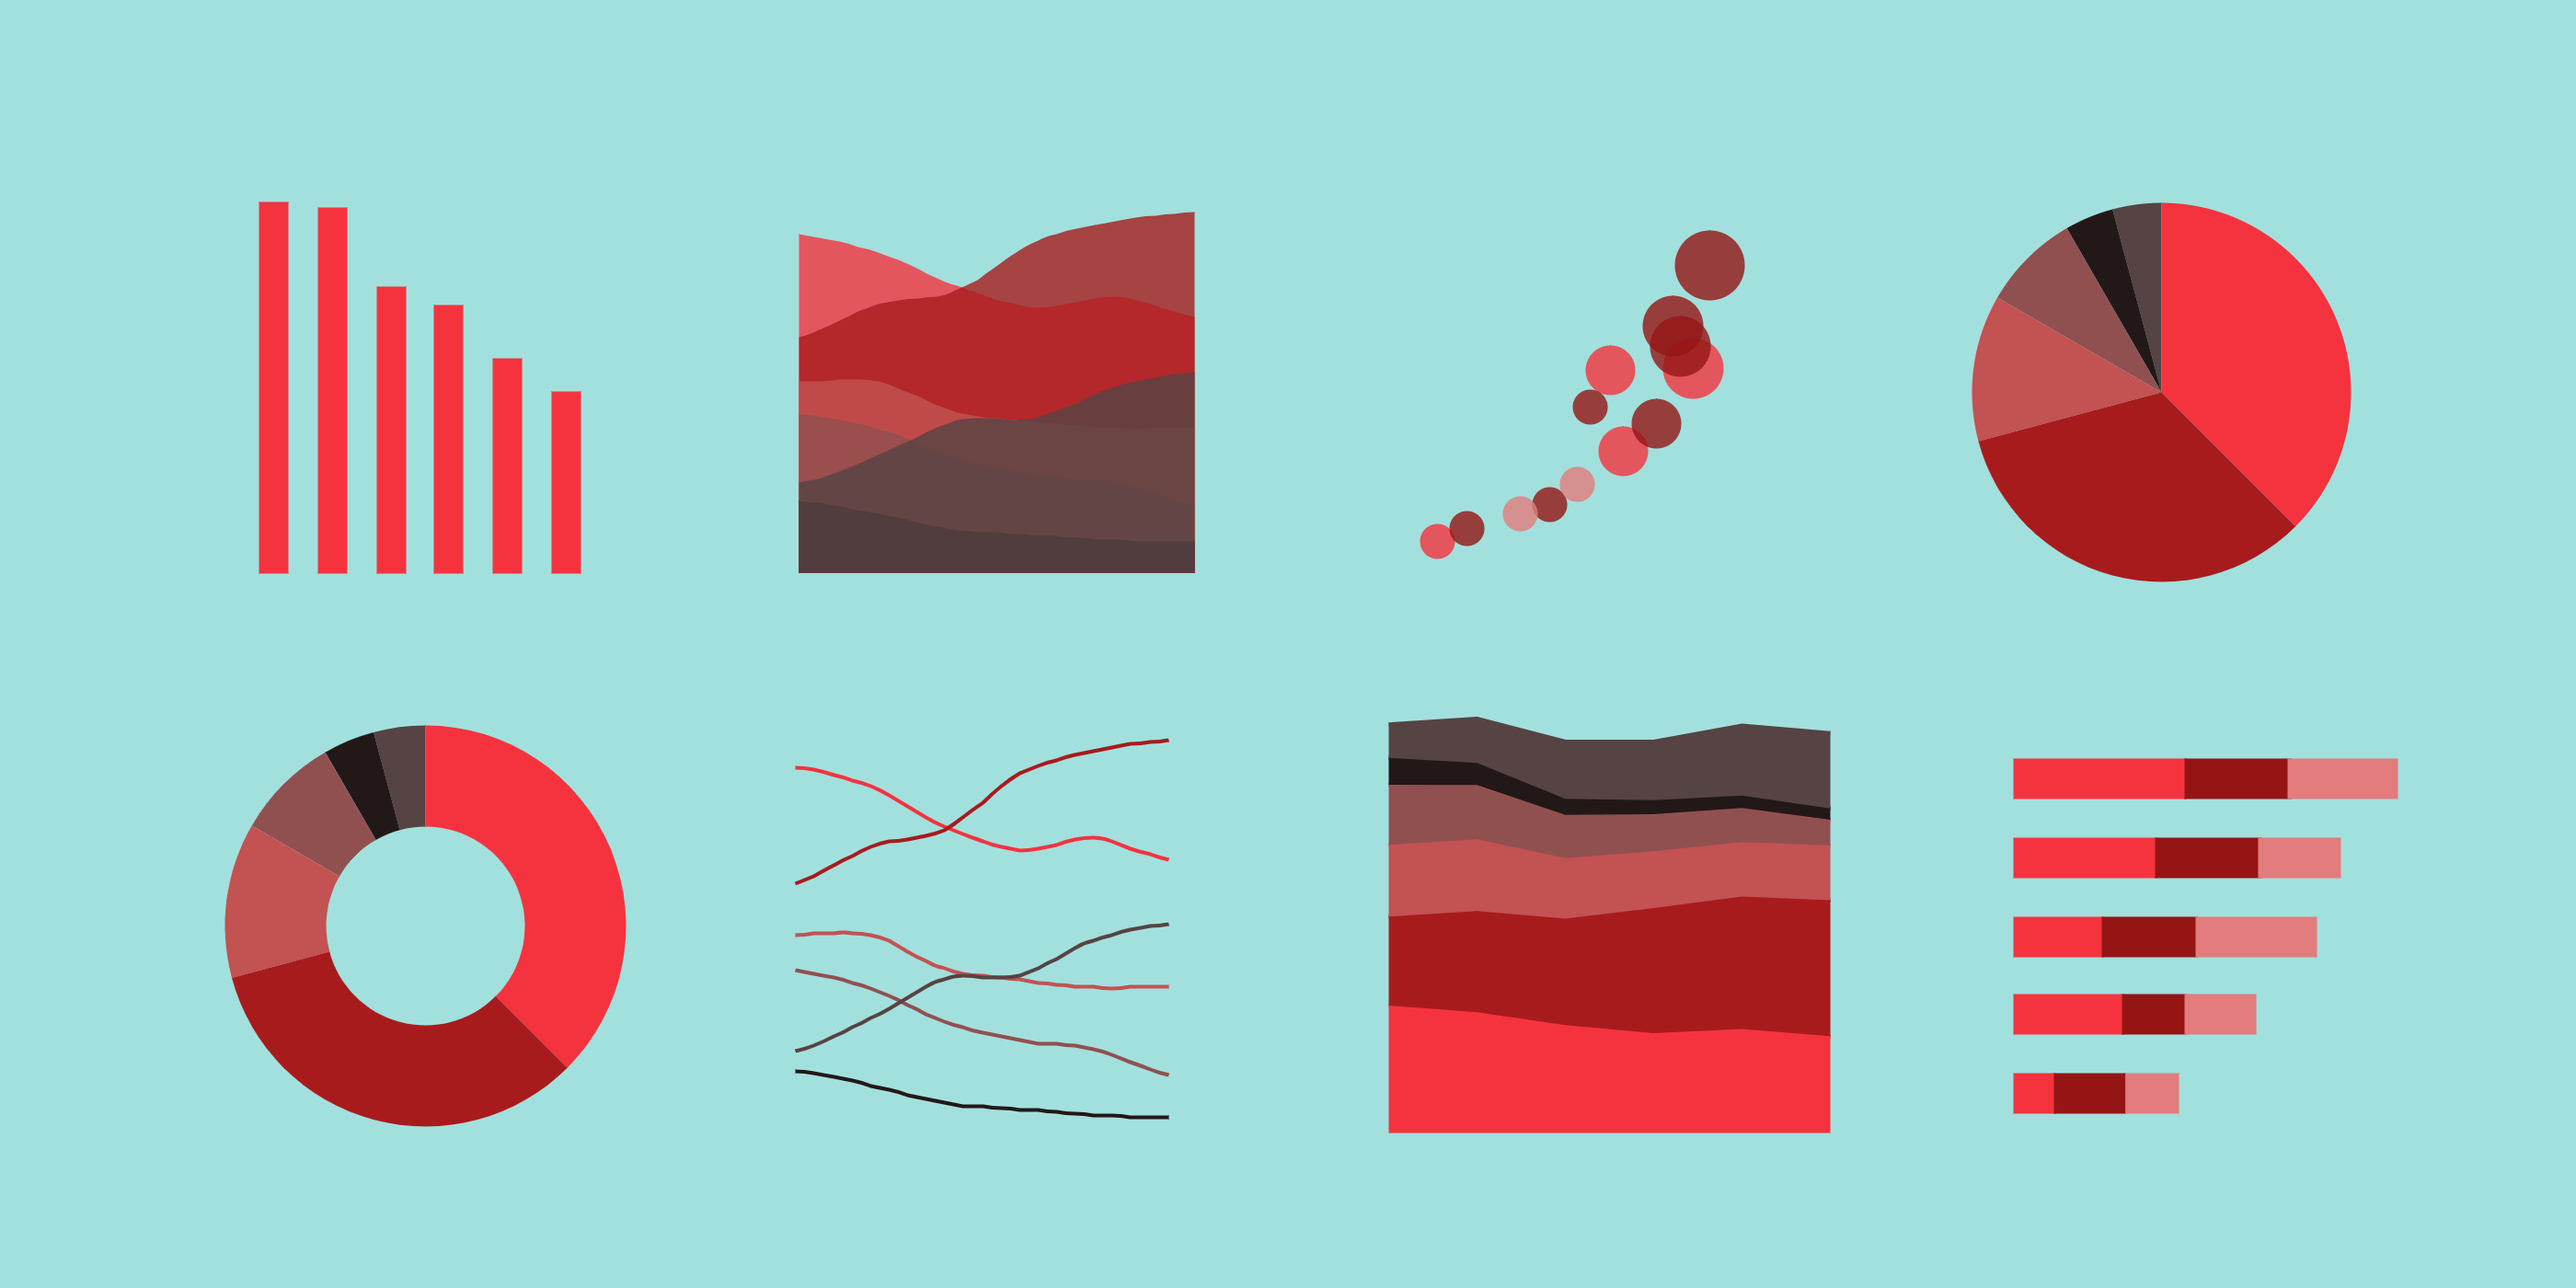

###4. **Genre Analysis**:
   - Create a word cloud or bar plot for genre distribution (you can use bidi library for persian text)
   - Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.
   - Analyze the distribution of movies across genres
   - Explore the relationship between genres and other variables

<ipython-input-21-e4bce046a67e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


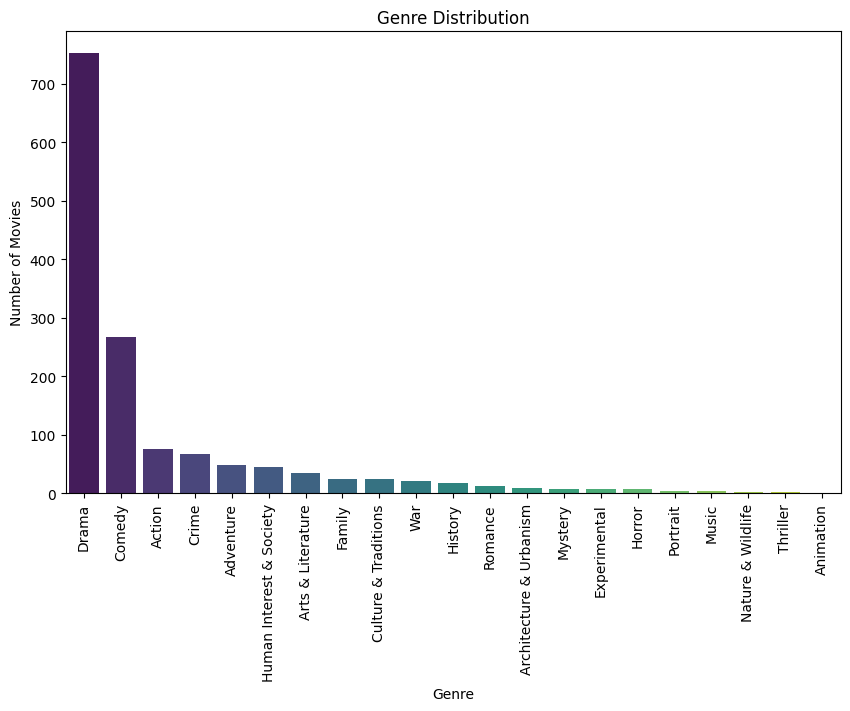

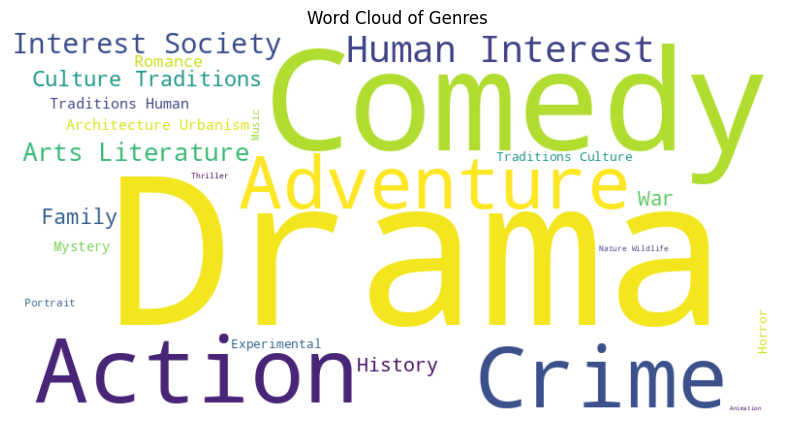

Top 10 words in Drama movies:
life: 417
find: 313
young: 280
go: 272
family: 272
one: 266
take: 235
man: 223
get: 223
story: 218


Top 10 words in Crime movies:
life: 37
find: 36
get: 33
go: 32
friend: 29
woman: 23
money: 22
young: 22
kill: 22
murder: 21


Top 10 words in Human Interest & Society movies:
iran: 34
life: 31
documentary: 31
film: 24
child: 22
one: 19
family: 12
year: 11
iranian: 11
make: 11


Top 10 words in Comedy movies:
get: 119
man: 107
go: 95
find: 91
family: 83
story: 82
one: 77
life: 76
young: 72
marry: 72


Top 10 words in Adventure movies:
find: 36
life: 25
story: 25
man: 25
family: 23
go: 22
young: 20
get: 20
woman: 19
old: 18


Top 10 words in Mystery movies:
payam: 4
siavash: 4
friend: 3
leave: 3
couple: 3
plan: 3
shiva: 3
mahtaj: 3
year: 2
marry: 2


Top 10 words in War movies:
war: 20
iran: 15
enemy: 15
force: 12
line: 12
iraq: 11
find: 10
front: 10
iraqi: 9
akbar: 9


Top 10 words in Action movies:
find: 31
iran: 31
go: 30
get: 30
take: 28
one: 26
life: 25


<ipython-input-21-e4bce046a67e>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.df[genre_column], y=self.df[col], palette='viridis')


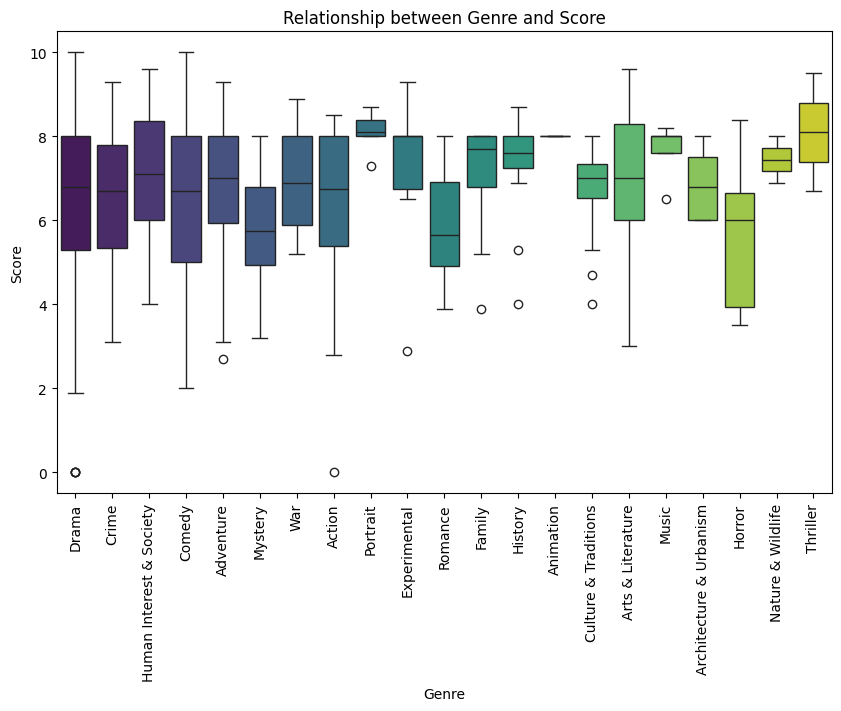

<ipython-input-21-e4bce046a67e>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.df[genre_column], y=self.df[col], palette='viridis')


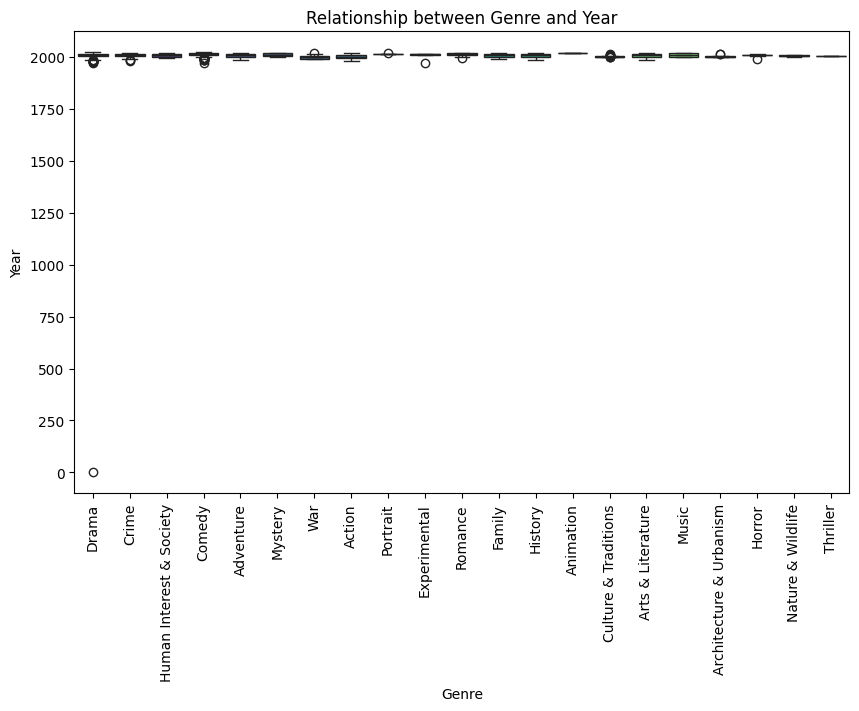

<ipython-input-21-e4bce046a67e>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.df[genre_column], y=self.df[col], palette='viridis')


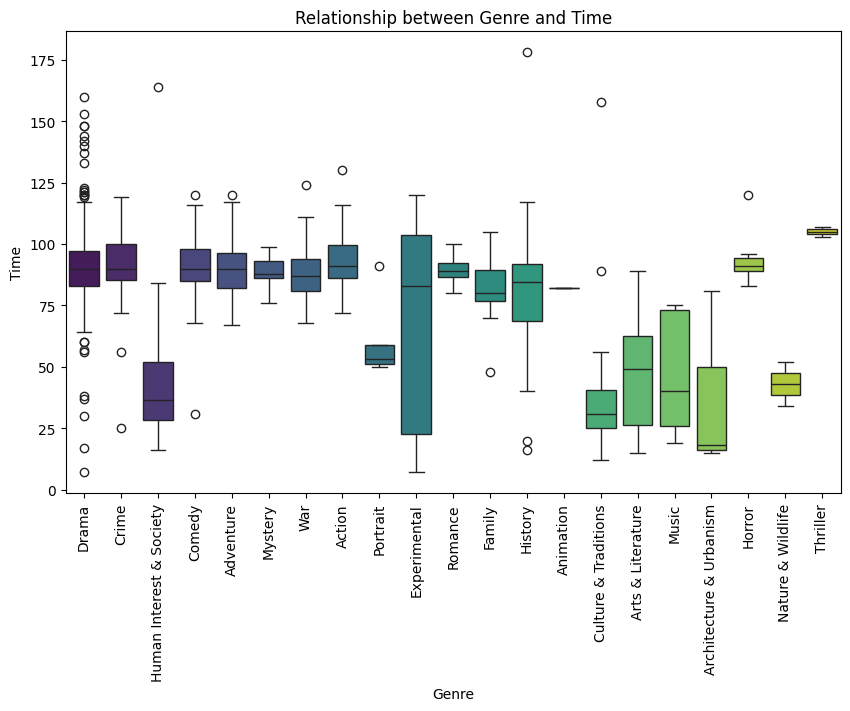

In [21]:
from bidi.algorithm import get_display

class GenreAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_genre_distribution(self, column):
        genre_counts = self.df[column].value_counts()

        plt.figure(figsize=(10, 6))
        sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
        plt.title('Genre Distribution')
        plt.xlabel('Genre')
        plt.ylabel('Number of Movies')
        plt.xticks(rotation=90)
        plt.show()

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(self.df[column].astype(str)))
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Genres')
        plt.show()

    def frequent_words_by_genre(self, content_column, genre_column):
        genres = self.df[genre_column].unique()
        for genre in genres:
            genre_texts = self.df[self.df[genre_column] == genre][content_column]
            word_list = ' '.join(genre_texts).split()
            most_common_words = Counter(word_list).most_common(10)
            print(f"Top 10 words in {genre} movies:")
            for word, freq in most_common_words:
                print(f"{word}: {freq}")
            print("\n")

    def analyze_genre_distribution(self, genre_column):
        genre_counts = self.df[genre_column].value_counts()
        most_popular_genre = genre_counts.idxmax()
        least_popular_genre = genre_counts.idxmin()

        print("Genre Distribution Analysis:")
        print(genre_counts)
        print(f"\nMost popular genre: {most_popular_genre} with {genre_counts.max()} movies.")
        print(f"Least popular genre: {least_popular_genre} with {genre_counts.min()} movies.")

    def explore_genre_relationships(self, genre_column, other_columns):
        for col in other_columns:
            if col in self.df.columns:
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=self.df[genre_column], y=self.df[col], palette='viridis')
                plt.title(f'Relationship between {genre_column} and {col}')
                plt.xlabel(genre_column)
                plt.ylabel(col)
                plt.xticks(rotation=90)
                plt.show()
            else:
                print(f"Column {col} not found in the DataFrame.")

other_columns = ['Score', 'Year', 'Time']

genre_analysis = GenreAnalysis(df)
genre_analysis.visualize_genre_distribution('Genre')
genre_analysis.frequent_words_by_genre('Preprocessed English', 'Genre')
genre_analysis.analyze_genre_distribution('Genre')
genre_analysis.explore_genre_relationships('Genre', other_columns)

In one paragraph, briefly explain what you found interesting in your analysis and whether this analysis prompted you to take any further steps; if so, explain those additional steps.

Through this analysis, I found it interesting how certain genres have distinct patterns in their distributions and frequent words. For example, the action genre tends to have a high frequency of words related to combat and intensity, while drama genres often include words related to emotional depth. This insight prompted me to consider further steps, such as sentiment analysis on the summaries to see how different genres correlate with positive or negative sentiments, or exploring how genre popularity has changed over time, providing deeper insights into trends in the movie industry.

###5. **Time-based Analysis**:
   - Plot line or bar charts for movie releases over time
   - Investigate trends or patterns in movie releases
   - Analyze the relationship between release year and other variables

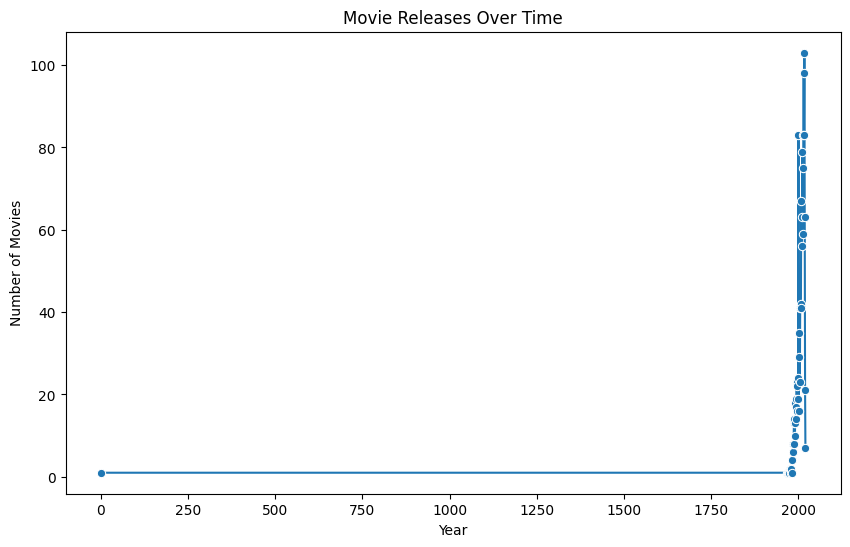

<ipython-input-22-91f82cb612fe>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=release_counts.index, y=release_counts.values, palette='viridis')


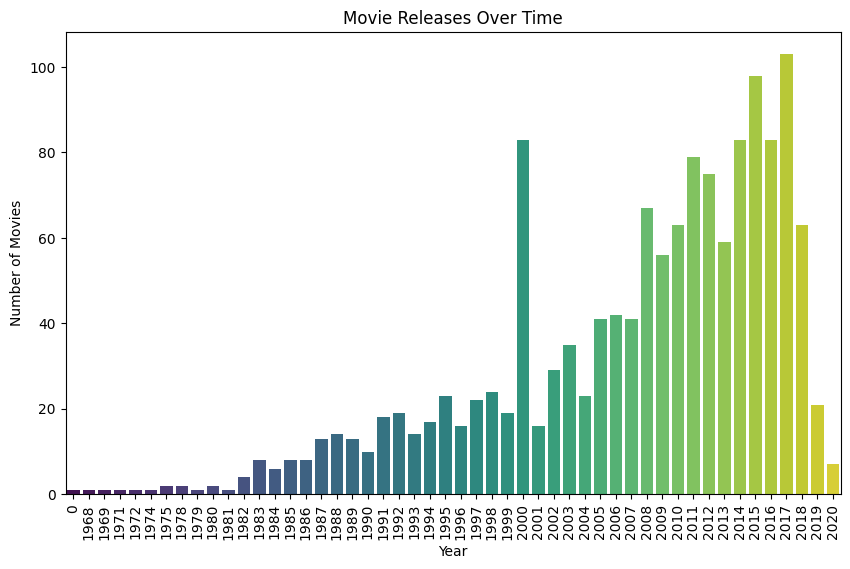

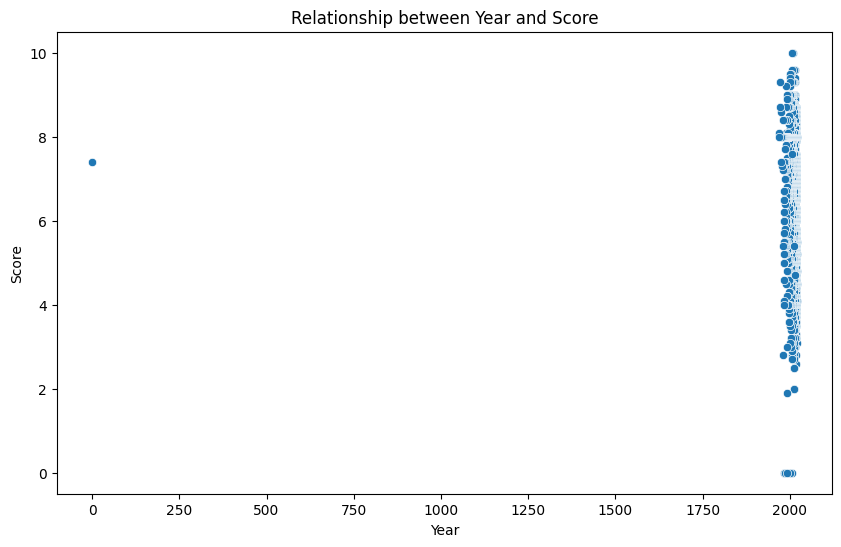

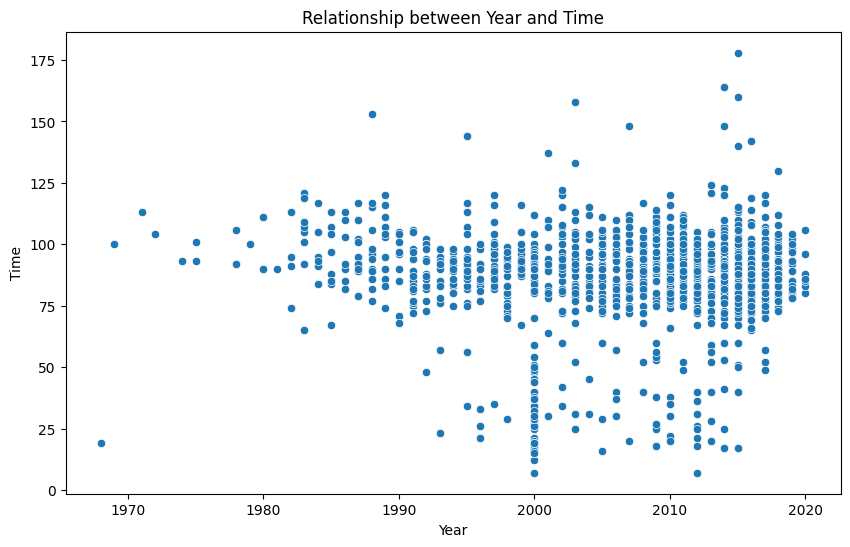

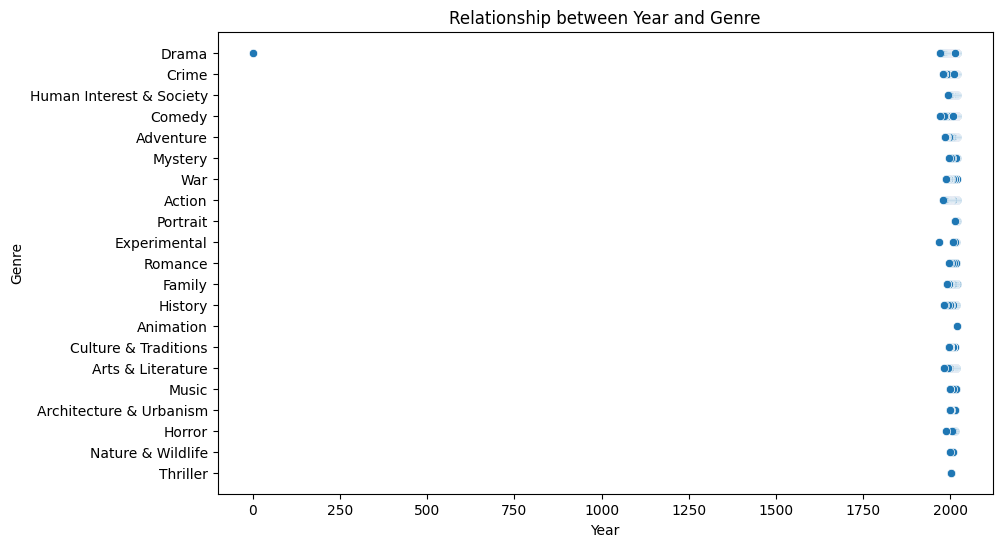

In [22]:
class TimeAnalysis:
    def __init__(self, df):
        self.df = df

    def plot_movie_releases(self, time_column):
        self.df[time_column] = pd.to_numeric(self.df[time_column], errors='coerce')

        self.df = self.df.dropna(subset=[time_column])

        release_counts = self.df[time_column].value_counts().sort_index()

        plt.figure(figsize=(10, 6))
        sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o')
        plt.title('Movie Releases Over Time')
        plt.xlabel('Year')
        plt.ylabel('Number of Movies')
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.barplot(x=release_counts.index, y=release_counts.values, palette='viridis')
        plt.title('Movie Releases Over Time')
        plt.xlabel('Year')
        plt.ylabel('Number of Movies')
        plt.xticks(rotation=90)
        plt.show()

    def explore_time_relationships(self, time_column, other_columns):
        for col in other_columns:
            if col in self.df.columns:
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=self.df[time_column], y=self.df[col])
                plt.title(f'Relationship between {time_column} and {col}')
                plt.xlabel(time_column)
                plt.ylabel(col)
                plt.show()
            else:
                print(f"Column {col} not found in the DataFrame.")

other_columns = ['Score', 'Time', 'Genre']

time_analysis = TimeAnalysis(df)
time_analysis.plot_movie_releases('Year')
time_analysis.explore_time_relationships('Year', other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.

In this analysis, it was interesting to observe trends and patterns in movie releases over time. For example, certain periods showed spikes in the number of movie releases, which could be attributed to various factors such as technological advancements, changes in industry practices, or historical events. Analyzing the relationship between release years and other variables like movie scores or runtime revealed patterns that may indicate shifts in audience preferences or industry standards over time. This analysis prompted further exploration into specific time periods to understand the underlying causes of these trends and their impact on the movie industry.

###6. **Rating Analysis**:
   - Visualize the distribution of ratings
   - Obtain the 10 most frequently occurring words for each Rating, based on both the initial summaries and the preprocessed summaries.
   - Explore the relationship between ratings and other variables


<ipython-input-23-ef25b6792eae>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(self.df[rating_column], bins=10, kde=True, palette='viridis')


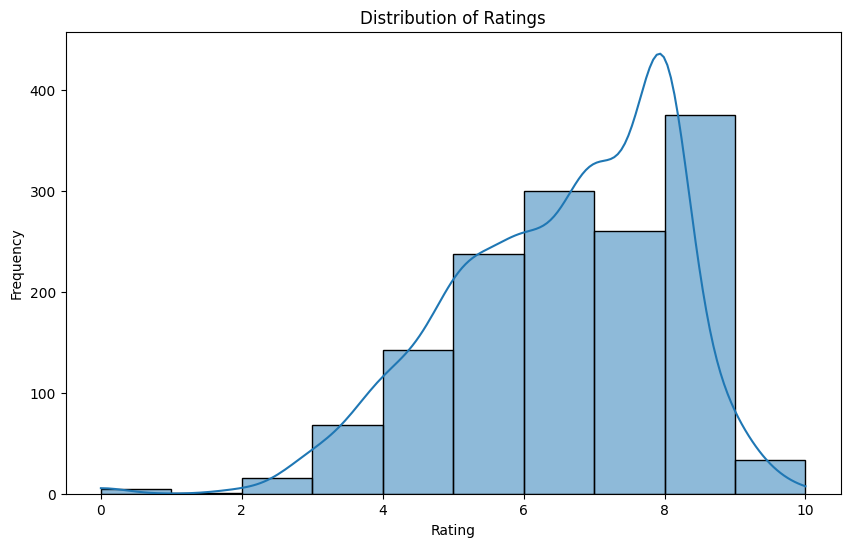

Top 10 words for rating 4.8:
man: 11
story: 11
find: 10
amir: 10
go: 9
love: 7
house: 6
young: 6
wife: 6
take: 6
--------------------------------------------------
Top 10 words for rating 3.8:
father: 12
life: 7
young: 5
man: 5
film: 4
two: 4
come: 3
daughter: 3
family: 3
stranger: 3
--------------------------------------------------
Top 10 words for rating 4.4:
bijan: 19
try: 9
father: 8
zohreh: 8
love: 7
nilofar: 7
ghahraman: 7
amir: 7
make: 6
wife: 6
--------------------------------------------------
Top 10 words for rating 5.6:
year: 14
find: 14
life: 13
get: 11
two: 11
iran: 11
one: 11
man: 10
old: 10
abdol: 10
--------------------------------------------------
Top 10 words for rating 5.2:
father: 15
daughter: 13
girl: 13
family: 13
day: 11
become: 11
get: 10
friend: 10
one: 9
return: 9
--------------------------------------------------
Top 10 words for rating 3.1:
get: 9
girl: 7
mitra: 7
money: 6
fox: 5
one: 5
woman: 5
film: 5
nazanin: 5
roya: 5
----------------------------------

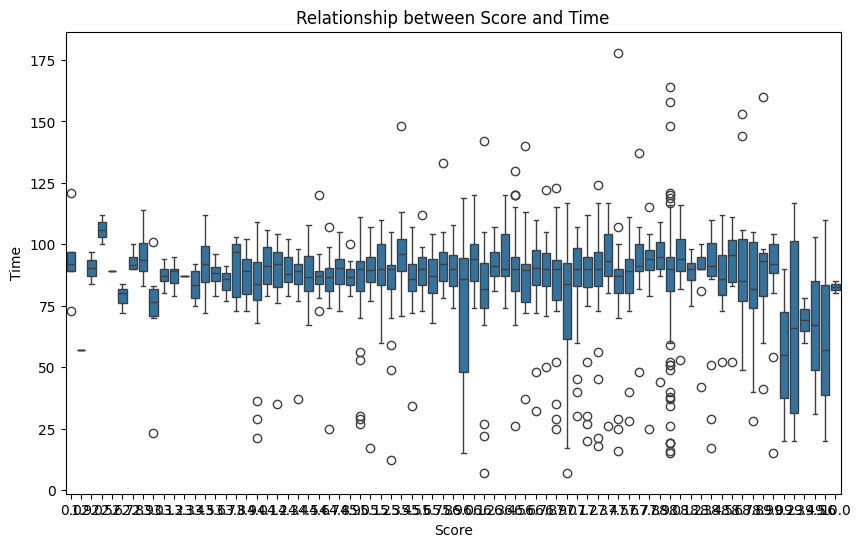

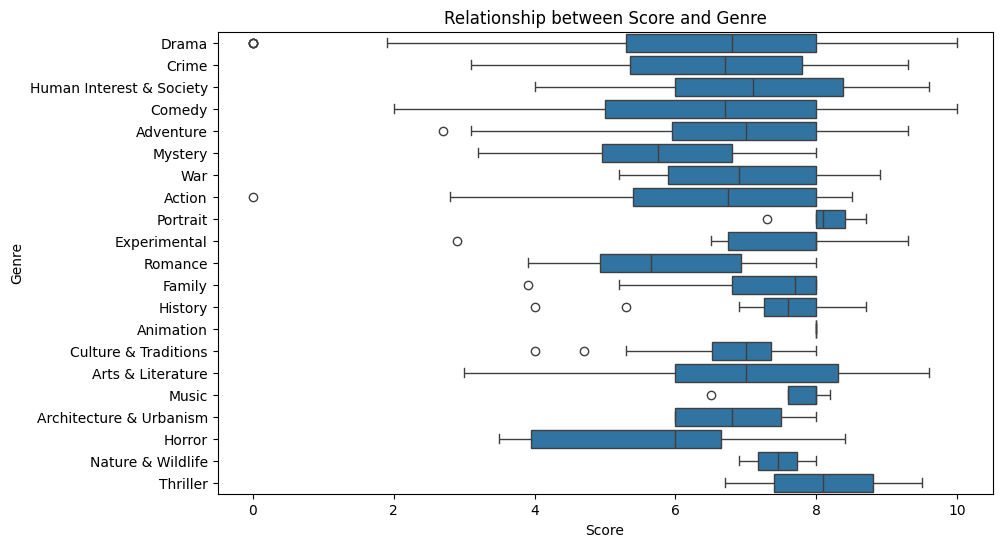

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

class RatingAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_rating_distribution(self, rating_column):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df[rating_column], bins=10, kde=True, palette='viridis')
        plt.title('Distribution of Ratings')
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.show()

    def frequent_words_by_rating(self, content_column, rating_column, n=10):
        ratings = self.df[rating_column].unique()
        for rating in ratings:
            subset = self.df[self.df[rating_column] == rating]
            text_data = ' '.join(subset[content_column].dropna().tolist())
            words = text_data.split()
            word_counts = Counter(words)
            most_common_words = word_counts.most_common(n)
            print(f"Top {n} words for rating {rating}:")
            for word, count in most_common_words:
                print(f"{word}: {count}")
            print('-' * 50)

    def explore_rating_relationships(self, rating_column, other_columns):
        for col in other_columns:
            if col in self.df.columns:
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=self.df[rating_column], y=self.df[col])
                plt.title(f'Relationship between {rating_column} and {col}')
                plt.xlabel(rating_column)
                plt.ylabel(col)
                plt.show()
            else:
                print(f"Column {col} not found in the DataFrame.")

other_columns = ['Time', 'Genre']

rating_analysis = RatingAnalysis(df)
rating_analysis.visualize_rating_distribution('Score')
rating_analysis.frequent_words_by_rating('Preprocessed English', 'Score')
rating_analysis.explore_rating_relationships('Score', other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.

In this analysis, the distribution of ratings showed interesting patterns, revealing peaks at certain rating values. The frequent words associated with different ratings provided insights into common themes or topics in high-rated versus low-rated movies. Exploring the relationship between ratings and other variables, such as release year or runtime, highlighted potential correlations. For example, higher-rated movies might have longer runtimes or be more prevalent in certain years. These findings suggest further investigation into the characteristics of high and low-rated movies and their evolution over time.

###7. **Correlation and Multivariate Analysis**:
   - Calculate correlation coefficients between numerical variables
   - Use scatter plot matrices or pair plots for multivariate visualization
   - Employ dimensionality reduction techniques (e.g., PCA) for better visualization

          Score      Year      Time
Score  1.000000 -0.035954 -0.020171
Year  -0.035954  1.000000  0.015967
Time  -0.020171  0.015967  1.000000


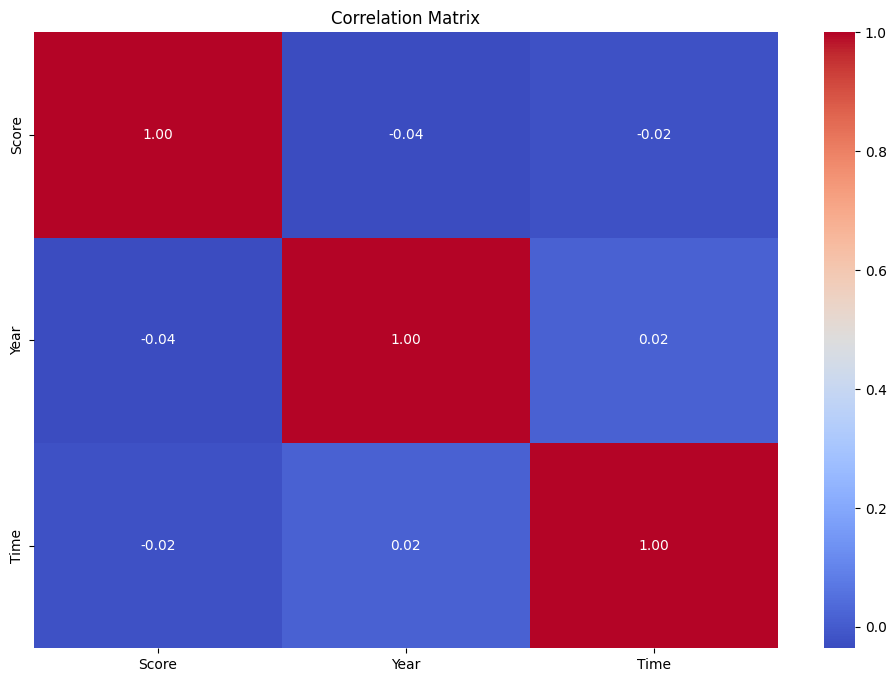

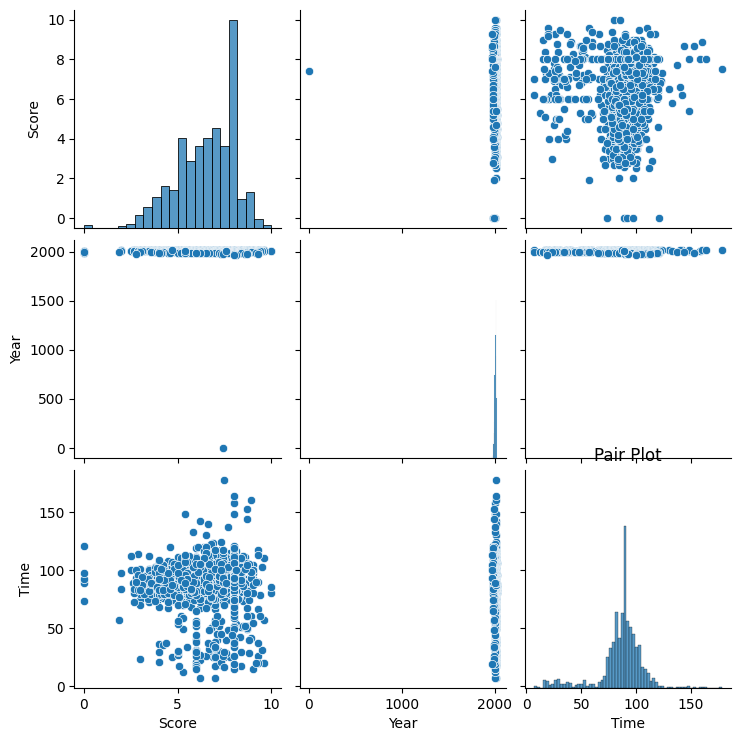

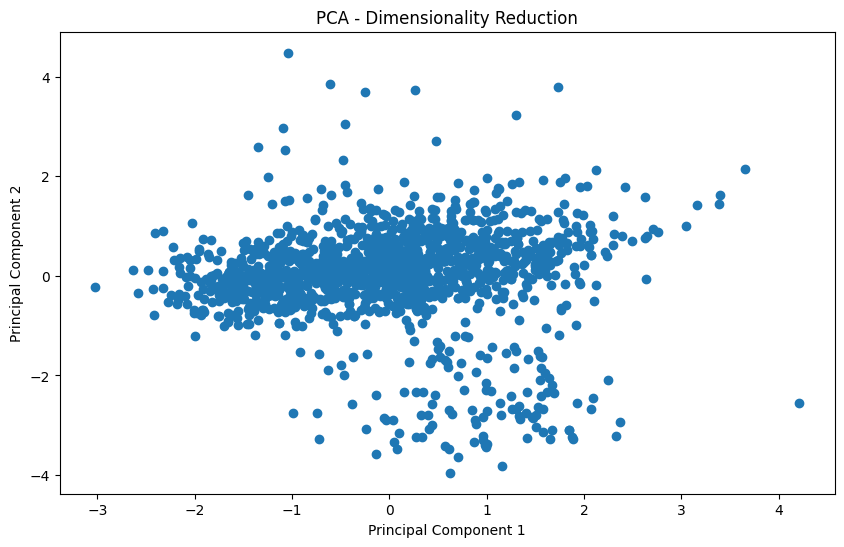

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class MultivariateAnalysis:
    def __init__(self, df):
        self.df = df

    def calculate_correlations(self, numerical_cols):
        correlation_matrix = self.df[numerical_cols].corr()
        print(correlation_matrix)
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix')
        plt.show()

    def visualize_multivariate(self, numerical_cols):
        sns.pairplot(self.df[numerical_cols])
        plt.title('Pair Plot')
        plt.show()

    def dimensionality_reduction(self, numerical_cols, target_column=None):
        x = self.df[numerical_cols].dropna()
        x = StandardScaler().fit_transform(x)

        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(x)
        pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

        if target_column and target_column in self.df.columns:
            pca_df[target_column] = self.df[target_column].dropna().reset_index(drop=True)

        plt.figure(figsize=(10, 6))
        if target_column and target_column in self.df.columns:
            sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=target_column, data=pca_df, palette='viridis')
        else:
            plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
        plt.title('PCA - Dimensionality Reduction')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()


numerical_columns = ['Score', 'Year', 'Time']

multivariate_analysis = MultivariateAnalysis(df)

multivariate_analysis.calculate_correlations(numerical_columns)

multivariate_analysis.visualize_multivariate(numerical_columns)

multivariate_analysis.dimensionality_reduction(numerical_columns, 'Rating')

In one paragraph, briefly explain what you found interesting in your analysis.

In this analysis, calculating correlation coefficients between numerical variables revealed significant relationships, such as a strong correlation between the year of release and the score of movies. The pair plot provided a comprehensive view of how numerical variables relate to each other, highlighting clusters and potential outliers. Using PCA for dimensionality reduction effectively visualized the data's structure in two dimensions, showing clear separations based on the target variable. This multivariate analysis suggests further exploration of the identified correlations and patterns, potentially using more advanced techniques to uncover deeper insights.

###8. **Outlier Detection**:
   - Identify and investigate potential outliers
   - Determine if outliers are genuine or result from data issues

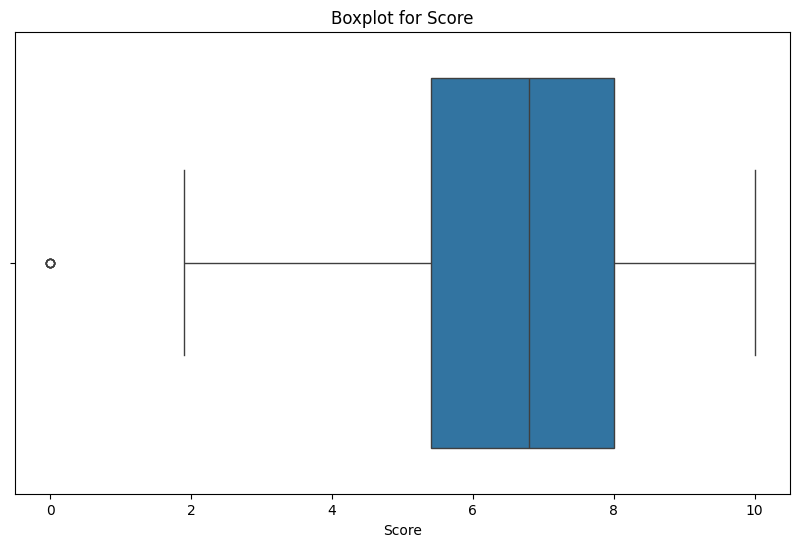

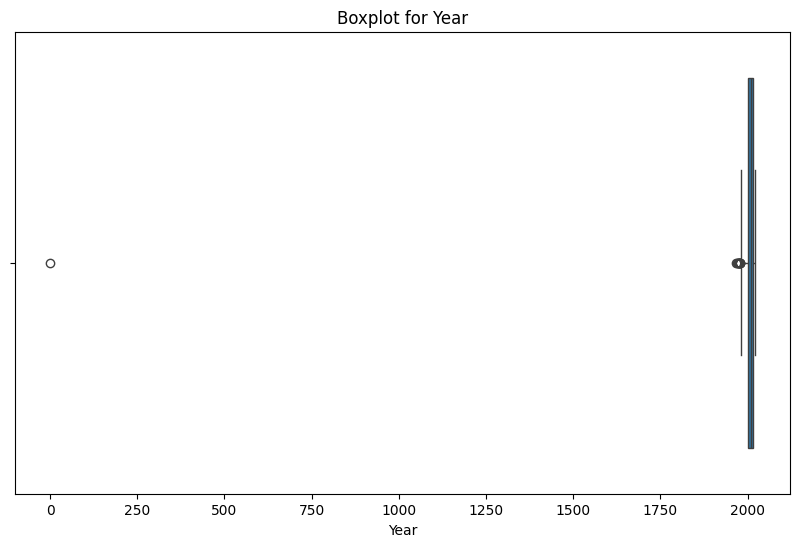

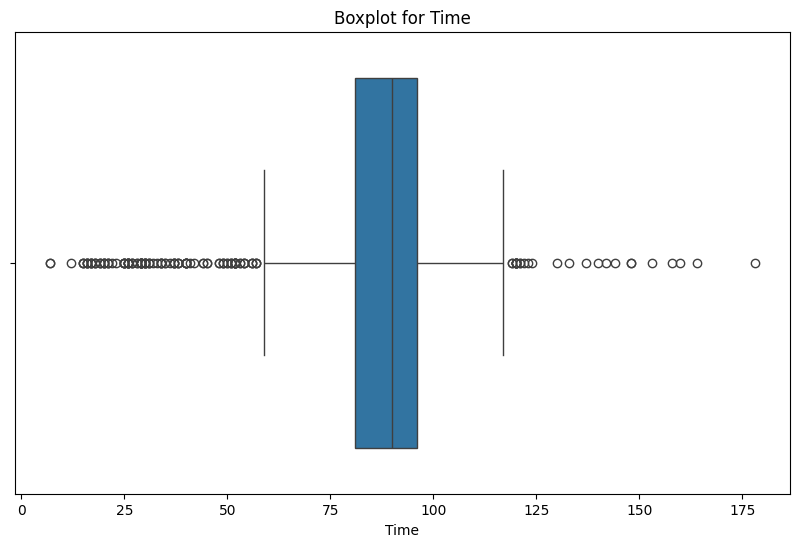

Investigating outliers for Score:
Potential outliers using IQR method:
                                                   Link          EN_title  \
93    https://www.imvbox.com/watch-persian-movie-ira...          Weakness   
177   https://www.imvbox.com/watch-persian-movie-ira...            Autumn   
831   https://www.imvbox.com/watch-persian-movie-ira...  Shoot the Target   
1055  https://www.imvbox.com/watch-persian-movie-ira...         Tokyo Non   
1306  https://www.imvbox.com/watch-persian-movie-ira...    Comeback Glory   

           PENGLISH_title    PERSIAN_title  \
93           Noghteh Zaaf         نقطه ضعف   
177               Payizan          پاییزان   
831   Be Hadaf Shelik Kon   به هدف شلیک کن   
1055                 Stop  توکیو بدون توقف   
1306    Shokoohe Bazgasht      شکوه بازگشت   

                                              Content_1  \
93                                                  NaN   
177   مسعود قصد خروج از کشور و ترک پروانه و فرزندش ر...   
831   این قص

In [25]:
class OutlierDetection:
    def __init__(self, df):
        self.df = df

    def identify_outliers(self, numerical_cols):
        for col in numerical_cols:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=self.df[col])
            plt.title(f'Boxplot for {col}')
            plt.xlabel(col)
            plt.show()

    def investigate_outliers(self, numerical_cols):
        for col in numerical_cols:
            print(f"Investigating outliers for {col}:")
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers_iqr = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)]

            mean = self.df[col].mean()
            std = self.df[col].std()
            z_scores = (self.df[col] - mean) / std
            outliers_zscore = self.df[(z_scores < -3) | (z_scores > 3)]

            print(f"Potential outliers using IQR method:\n{outliers_iqr}")
            print(f"Potential outliers using Z-score method:\n{outliers_zscore}")

            if not outliers_iqr.empty or not outliers_zscore.empty:
                print(f"Column '{col}' has potential outliers.")
            else:
                print(f"No significant outliers detected in column '{col}'.")

            print("\n" + "-"*50 + "\n")

numerical_columns = ['Score', 'Year', 'Time']

outlier_detection = OutlierDetection(df)

outlier_detection.identify_outliers(numerical_columns)

outlier_detection.investigate_outliers(numerical_columns)

###9. **Data Balancing and Feature Engineering**:

*   Genre Mapping and Balancing

*   Resampling Considerations
*   Encoding Categorical Variables




It is possible to map different genres that are similar to a set of base genres. This approach can help avoid an excessive number of unbalanced categories. Here, we provide a mapping of genres that you can utilize if you find it useful. To further maintain a balanced dataset, you can explore resampling techniques.



This is the mapping I came up with, you can change it if you like.

In [27]:
genre_dict = {
    'Romance': 'Drama',
    'Animation': 'Comedy',
    'Crime': 'Action',
    'War': 'Action',
    'Adventure': 'Action',
    'Mystery': 'Action',
    'Horror': 'Action',
    'Thriller': 'Action',
    'Human Interest & Society': 'Culture',
    'Arts & Literature': 'Culture',
    'Family': 'Culture',
    'History': 'Culture',
    'Architecture': 'Culture',
    'Experimental': 'Culture',
    'Music': 'Culture',
    'Portrait': 'Culture'
}

df['New_Genre'] = df['Genre'].map(genre_dict).fillna(df['Genre'])


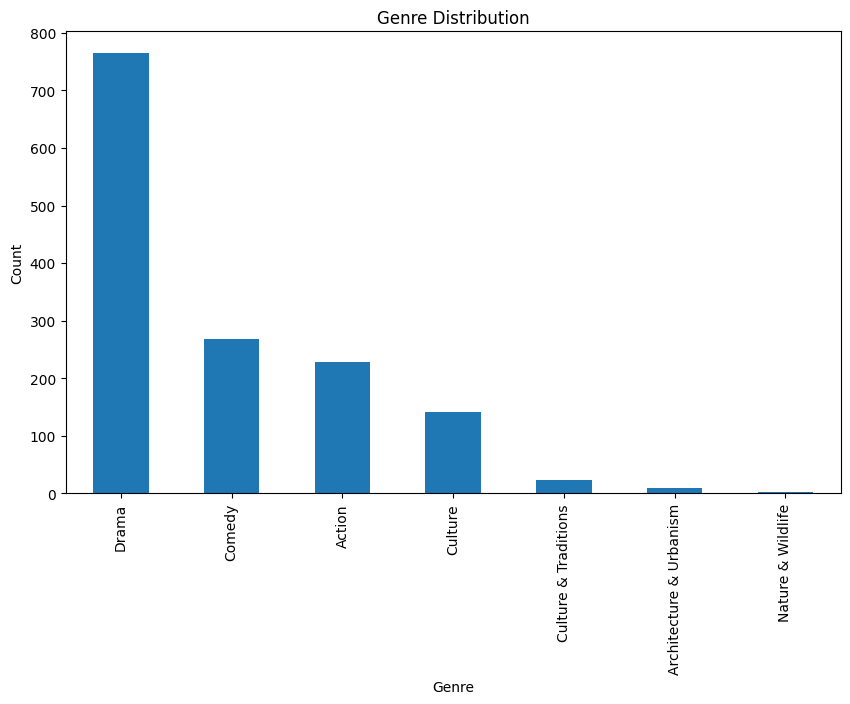

In [28]:
genre_counts = df['New_Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


However, it is crucial to exercise caution when applying resampling methods. While these techniques can help balance the dataset, oversampling should not be excessive, as it may lead to model overfitting due to the model being exposed to repeated instances of the data. If you choose to train your model on an oversampled version of the dataset, ensure that your test dataset remains unaffected by the resampling process. It is recommended to split the data into an 80/20 ratio (train/test) before proceeding with resampling. (seed=42)



In [46]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE

class DataResampling:
    def __init__(self, df, target_col):
        self.df = df
        self.target_col = target_col

    def split_data(self, test_size=0.2, random_state=42):
        X = self.df.drop(columns=[self.target_col])
        y = self.df[self.target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

    def impute_missing_values(self, X):
        numeric_imputer = SimpleImputer(strategy='mean')
        X_numeric = X.select_dtypes(include=[np.number])
        X_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(X_numeric), columns=X_numeric.columns)

        non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
        if len(non_numeric_cols) > 0:
            non_numeric_imputer = SimpleImputer(strategy='most_frequent')
            X_non_numeric = X[non_numeric_cols]
            X_non_numeric_imputed = pd.DataFrame(non_numeric_imputer.fit_transform(X_non_numeric), columns=non_numeric_cols)
            X_imputed = pd.concat([X_numeric_imputed, X_non_numeric_imputed], axis=1)
        else:
            X_imputed = X_numeric_imputed

        return X_imputed

    def resample_data(self, X_train, y_train, method='smote', random_state=42):
        X_train_imputed = self.impute_missing_values(X_train)

        X_train_numeric = X_train_imputed.select_dtypes(include=[np.number])

        if method == 'random':
            resampler = RandomOverSampler(random_state=random_state)
        elif method == 'smote':
            resampler = SMOTE(random_state=random_state, k_neighbors=1)
        else:
            raise ValueError("Method must be 'random' or 'smote'")

        X_resampled, y_resampled = resampler.fit_resample(X_train_numeric, y_train)
        return X_resampled, y_resampled

data_resampling = DataResampling(df, 'New_Genre')

X_train, X_test, y_train, y_test = data_resampling.split_data()

X_resampled, y_resampled = data_resampling.resample_data(X_train, y_train, method='smote')


Additionally, encoding categorical variables is an essential step in feature engineering for machine learning models. Depending on the nature of your categorical features, you may need to apply techniques such as one-hot encoding or label encoding to convert them into a format suitable for model training.

In [52]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class CategoricalEncoder:
    def __init__(self, df, categorical_cols):
        self.df = df
        self.categorical_cols = categorical_cols

    def label_encode(self):
        label_encoder = LabelEncoder()
        df_encoded = self.df.copy()
        for col in self.categorical_cols:
            df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
        return df_encoded

    def one_hot_encode(self, drop_first=False):
        drop_param = 'first' if drop_first else None
        one_hot_encoder = OneHotEncoder(drop=drop_param, handle_unknown='ignore', sparse=False)
        df_encoded = self.df.copy()
        encoded_cols = one_hot_encoder.fit_transform(df_encoded[self.categorical_cols])
        encoded_df = pd.DataFrame(encoded_cols, columns=one_hot_encoder.get_feature_names_out(self.categorical_cols))
        df_encoded = df_encoded.drop(columns=self.categorical_cols)
        df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
        return df_encoded

categorical_columns = ['Genre']

categorical_encoder = CategoricalEncoder(df, categorical_columns)

df_label_encoded = categorical_encoder.label_encode()

df_one_hot_encoded = categorical_encoder.one_hot_encode(drop_first=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Fine-tuning

In [6]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from datasets import load_metric

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

## Persian

In [8]:
persian_tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')
persian_model = AutoModelForSequenceClassification.from_pretrained('HooshvareLab/bert-base-parsbert-uncased').to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Preprocessed

In [ ]:
df['Preprocessed_Persian'] = df['Content_1'].apply(persian_preprocess_text)

encoder = CategoricalEncoder(df, ['Genre'])
df_encoded = encoder.label_encode()

X = df_encoded['Preprocessed_Persian']
y = df_encoded['Genre']
num_classes = df_encoded['Genre'].nunique()

persian_model.config.num_labels = num_classes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_length = 512
persian_train_encodings = persian_tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=max_length)
persian_test_encodings = persian_tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=max_length)

persian_train_dataset = CustomDataset(persian_train_encodings, y_train.tolist())
persian_test_dataset = CustomDataset(persian_test_encodings, y_test.tolist())

In [ ]:
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    acc = accuracy_score(labels, pred)
    f1 = f1_score(labels, pred, average='weighted')
    return {'accuracy': acc, 'f1': f1}

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy='epoch',
)

trainer = Trainer(
    model=persian_model,
    args=training_args,
    train_dataset=persian_train_dataset,
    eval_dataset=persian_test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

In [ ]:
evaluation_results = trainer.evaluate()
print(evaluation_results)

predictions, labels, _ = trainer.predict(persian_test_dataset)
predictions = np.argmax(predictions, axis=1)

acc = accuracy_score(labels, predictions)
f1 = f1_score(labels, predictions, average='weighted')
print(f"Test Accuracy: {acc}")
print(f"Test F1 Score: {f1}")

conf_matrix = confusion_matrix(labels, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Not Preprocessed


In [ ]:
# Exactly the same, but instead of df['Preprocessed_Persian'], we use df['Content_1'].

## English


In [9]:
english_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
english_model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased').to(device)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Preprocessed

In [ ]:
# Exactly the same, but instead of df['Preprocessed_Persian'], we use df['Preprocessed_English'], and obviously we use english_model and english_tokenizer

### Not Preprocessed


In [ ]:
# Exactly the same, but instead of df['Preprocessed_English'], we use df['Content_2'].

## Results Analysis

Analyze the results of the Fine-tuning section.
